###### Laboratorium 6

Interpolacja

In [12]:
using Pkg
Pkg.add("Interpolations")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [15]:
using Plots
using Interpolations
using CSV
using Statistics
using DataFrames
using Polynomials

In [15]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
A = [rand() for x in xs]

10-element Array{Float64,1}:
 0.7586764036352422 
 0.29720911063590894
 0.25430138941654423
 0.4441982046264261 
 0.6474756247979367 
 0.9237125470255705 
 0.22676550690710462
 0.940007875610646  
 0.24602228865498876
 0.22473859178364797

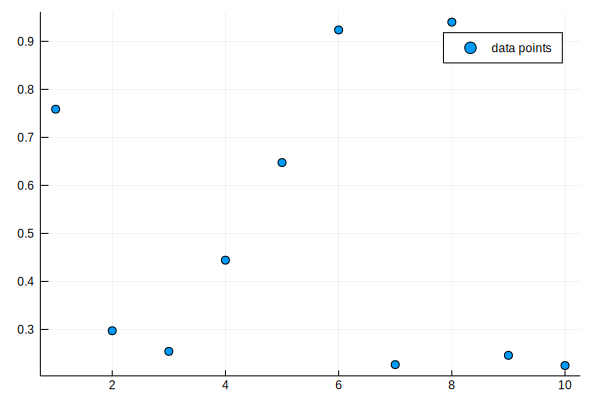

In [16]:
scatter(xs,A, label="data points")

In [17]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

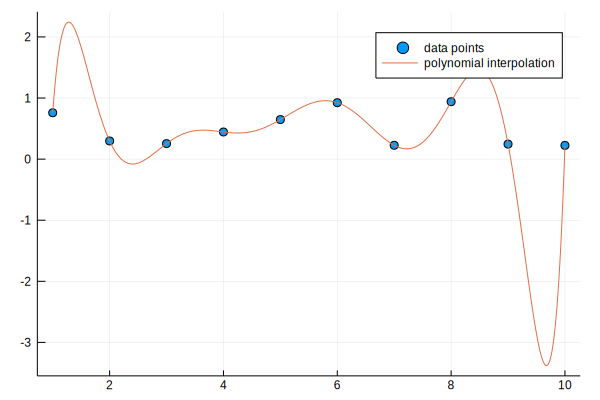

In [18]:
# interpolacja wielomianowa w pakiecie Polynomials
using Polynomials
fit1=polyfit(xs, A)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="polynomial interpolation")

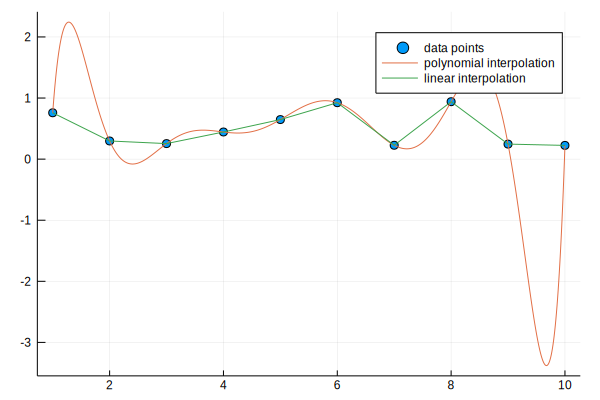

In [19]:
#  interpolacja liniowa z pakietu Interpolations - przykład
interp_linear = LinearInterpolation(xs, A)
B=[interp_linear(x) for x in xsf]
plot!(xsf,B, label="linear interpolation")

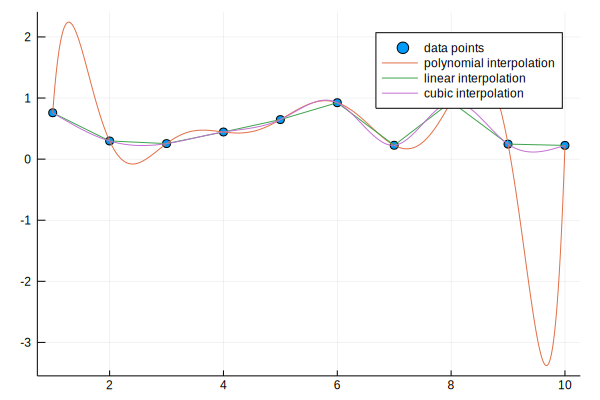

In [20]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")

In [21]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Array{Float64,1}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.7586764036352421 
 0.29720911063590894
 0.2543013894165442 
 0.444198204626426  
 0.6474756247979366 
 0.9237125470255705 
 0.22676550690710445
 0.9400078756106461 
 0.24602228865498876
 0.224738591783648  

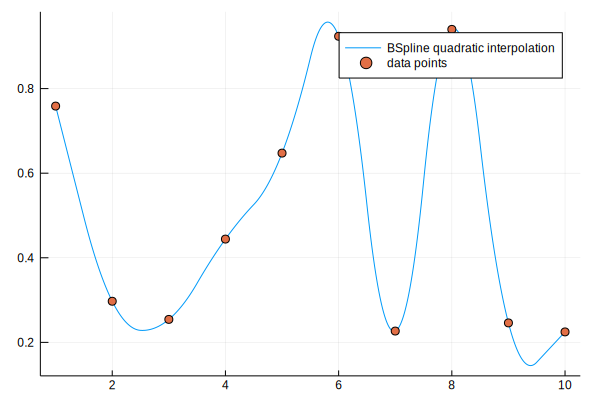

In [22]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic interpolation")
scatter!(xs,A, label="data points")

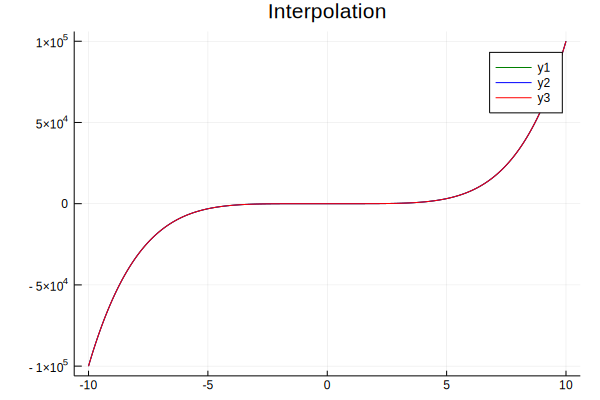

In [26]:
x = [-400, -100, -3, 100, 200, 1000]
y = [-10240000000000, -10000000000, -243, 10000000000, 320000000000, 1000000000000000]   # f(x) = x^5
newt_inter = Poly([0.0000000000000, 0.0000000000000, 0.0000000000000, 0.0000000000000, 0.0000000000000, 1.0000000000000])
lagr_inter = Poly([0.0000000000000, -0.0000002384186, 0.0000000004657, 0.0000000000291, -0.0000000000000, 1.0000000000000])
corr_inter = polyfit(x, y)
xd=-10:0.01:10
scatter()
plot!(xd,polyval(corr_inter, xd), colour = [:green], title = "Interpolation")
plot!(xd,polyval(newt_inter, xd), colour = [:blue])
plot!(xd,polyval(lagr_inter, xd), colour = [:red])

In [31]:
newt_inter

Poly(1.0*x^5)

In [32]:
lagr_inter

Poly(-2.384186e-7*x + 4.657e-10*x^2 + 2.91e-11*x^3 + 1.0*x^5)

In [33]:
corr_inter

Poly(1.0*x^5)

In [34]:
# Metoda Lagrange'a jest narażona na duże błędy zmiennoprzecinkowe z racji wzoru

In [9]:
results=CSV.read("results.csv")

results_data=by(results,
[:N,:method],
    df->DataFrame(mean=mean(df[:real_time]), stddev=std(df[:real_time])))
sort(results_data, [:N,:method])

,N,method,mean,stddev
,Int64⍰,String⍰,Float64,Float64
1,23,lagrange,0.0003286,4.90899e-5
2,23,newton,3.34e-5,2.02989e-5
3,47,lagrange,0.0019744,0.000154136
4,47,newton,0.0001169,5.72139e-5
5,95,lagrange,0.0086498,0.00107792
6,95,newton,0.0003146,0.000156024


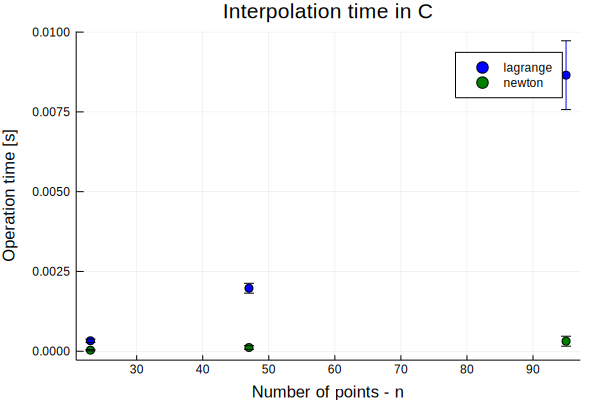

In [13]:
scatter(results_data[:N],
    xlabel="Number of points - n",
    ylabel="Operation time [s]",
    results_data[:mean], 
    group=results_data[:method], 
    colour=[:blue :green :red],
    yerr=results_data[:stddev],
    layout=1,
    title="Interpolation time in C")